In [101]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

estacion = '5530E'
df = pd.read_csv(r'./data/'+estacion+'_clean.csv', sep=',')

In [102]:
df.columns

Index(['tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'sol',
       'presmax', 'presmin', 'year', 'month', 'day', 'rain_today',
       'rain_tomorrow', 'horatmin_', 'horatmax_', 'horaracha_',
       'horapresmin_'],
      dtype='object')

### Feature Selection

In [103]:
feature_cols = ['tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'sol',
       'presmax', 'presmin', 'year', 'month', 'day', 'rain_today',
        'horatmin_', 'horatmax_', 'horaracha_',
       'horapresmin_']

In [104]:


X = df[['tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'sol',
       'presmax', 'presmin', 'year', 'month', 'day', 'rain_today',
        'horatmin_', 'horatmax_', 'horaracha_',
       'horapresmin_']]
y = df['rain_tomorrow']

### Splitting Data

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Building Decision Tree Model

In [106]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model

### Model Accuracy, how often is the classifier correct?

In [107]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7821681864235056


### Visualizing Decision Trees

In [109]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('rain_tomorrow_01.png')
Image(graph.create_png())

### Optimizing Decision Tree Performance

In [110]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8429584599797366


### Visualizing Decision Trees

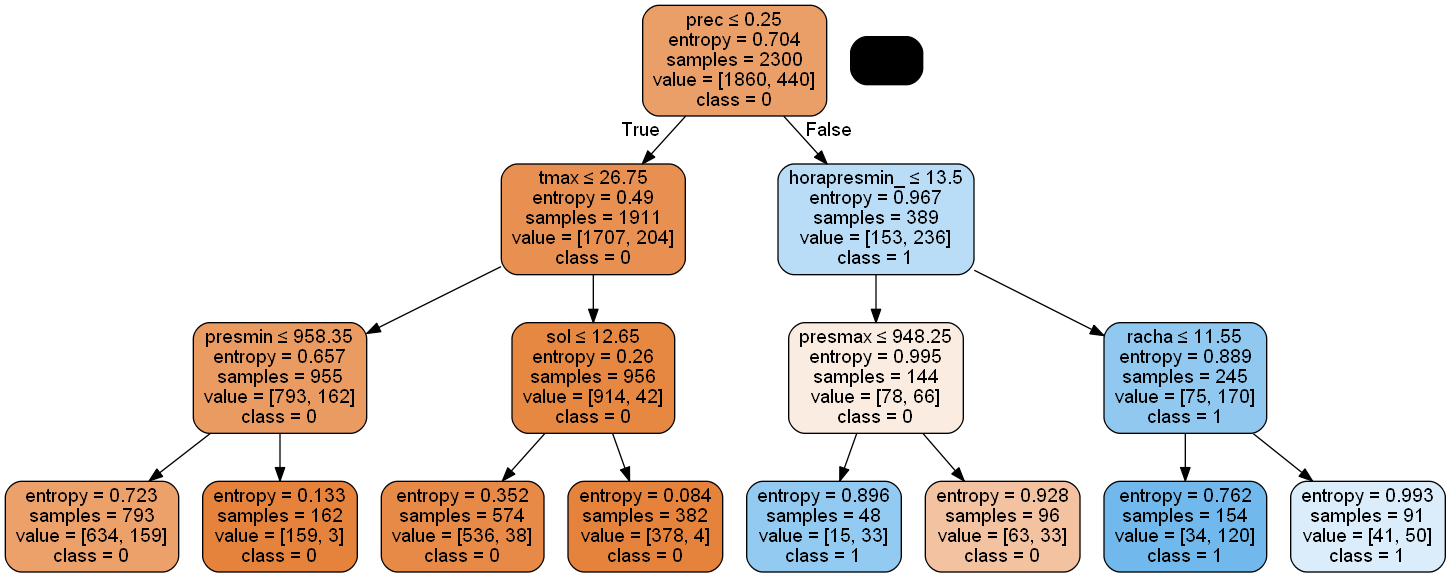

In [111]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('rain_tomorrow_02.png')
Image(graph.create_png())